Feature ranking:
1. feature 306 (0.015042)
2. feature 228 (0.008461)
3. feature 269 (0.008025)
4. feature 1497 (0.007036)
5. feature 264 (0.007004)
6. feature 201 (0.006586)
7. feature 114 (0.006399)
8. feature 132 (0.006008)
9. feature 1683 (0.005985)
10. feature 199 (0.005926)
11. feature 266 (0.005738)
12. feature 224 (0.005598)
13. feature 1671 (0.005533)
14. feature 1681 (0.004997)
15. feature 502 (0.004995)
16. feature 261 (0.004868)
17. feature 735 (0.004789)
18. feature 1503 (0.004779)
19. feature 117 (0.004764)
20. feature 314 (0.004731)
21. feature 1641 (0.004673)
22. feature 1664 (0.004655)
23. feature 1655 (0.004568)
24. feature 1647 (0.004552)
25. feature 1638 (0.004442)
26. feature 1677 (0.004416)
27. feature 263 (0.004409)
28. feature 1660 (0.004394)
29. feature 1682 (0.004260)
30. feature 1517 (0.004245)
31. feature 265 (0.004231)
32. feature 1680 (0.004226)
33. feature 176 (0.004226)
34. feature 726 (0.004216)
35. feature 276 (0.004180)
36. feature 601 (0.004123)
37. f

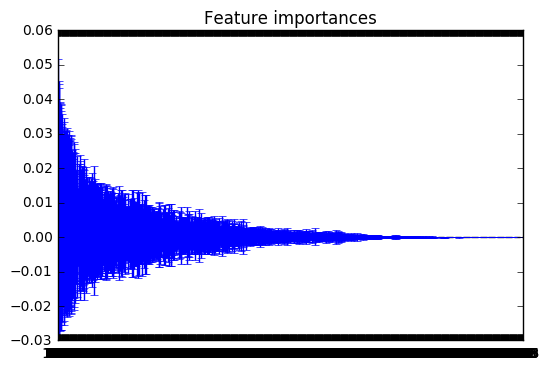

前九個較有效屬性:
section_names_header
ent_q_diff_diffs_2_min
ent_p_12
dc_por
ent_p_7
ent_q_diff_diffs_1_min
ent_q_diffs_19
ent_q_diff_diffs_10
Img49
較無效屬性(entropy等於0):
__vbaVar2Vec
__vbaFixstrConstruct
GetFileTitleA
ProcCallEngine
__vbaAryConstruct2
MethCallEngine
*invalid*
INTERNET_STATUS_CALLBACK
fstcwimul
DeleteEnhMetaFile
PCCTL_CONTEXT
__vbaLsetFixstr


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

data = pd.read_csv('C:/Users/Brian/Anaconda2/LargeTrain.csv')

X = data.drop(['Class'],1)
y = data['Class']
forest = ExtraTreesClassifier(n_estimators=500,criterion='entropy')

#X : array-like or sparse matrix of shape = [n_samples, n_features] ,The training input samples.
#y : array-like, shape = [n_samples] or [n_samples, n_outputs] , The target values .
forest.fit(X, y)
importances = forest.feature_importances_ #Return the feature importances (the higher, the more important the feature).
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

print '前九個較有效屬性:'
for i in range(9):
    print data.columns[indices[i]]
    
print '較無效屬性(entropy等於0):'
for i in range(X.shape[1]):
    if importances[indices[i]] == 0.0:
        print data.columns[indices[i]]